In [40]:
# Import packages from Python standard library
import numpy as np
import pandas as pd
import re
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [43]:
#Data including zeros
branches = pd.read_csv('../can-summer-2023/data/clean/branch_metrics.csv')
    #Fill NaN with 0
branches['COMPUTER_SESSIONS'] = branches['COMPUTER_SESSIONS'].fillna(0)
branches['VISITORS'] = branches['VISITORS'].fillna(0)

In [44]:
branches.head()

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,2011,1,8427.0,1666.0,9604.0
1,Albany Park,2011,2,7023.0,1296.0,10500.0
2,Albany Park,2011,3,9702.0,1735.0,9050.0
3,Albany Park,2011,4,9344.0,1841.0,9300.0
4,Albany Park,2011,5,8865.0,1683.0,8271.0


In [4]:
#Data not including zeros
branches_nonzero = branches[(branches['VISITORS'] > 0) & (branches['COMPUTER_SESSIONS'] > 0)]
    #Locating a list of branches where the computer sessions > visitors
branches_sessions = branches_nonzero.loc[(branches_nonzero['COMPUTER_SESSIONS']) >= branches_nonzero['VISITORS']]

## Comparsion of %'s of Computer Sessions / Visitors: INCLUDING ZEROS

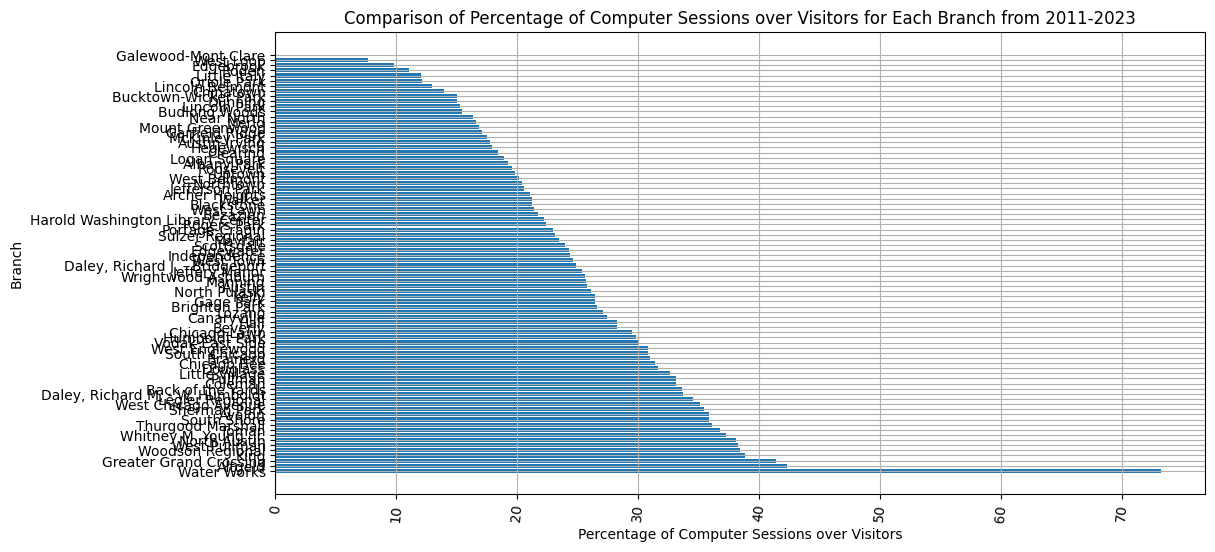

In [16]:
# Calculate the sum of Computer Sessions and sum of Visitors from all years
branch_metrics = branches.groupby('BRANCH').agg({'COMPUTER_SESSIONS': 'sum', 'VISITORS': 'sum'})

# Adding a column that calculates the Computer Session Percentage (computer sessions/visitors)*100
branch_metrics['COMPUTER_SESSION_PERCENTAGE'] = (branch_metrics['COMPUTER_SESSIONS'] / branch_metrics['VISITORS']) * 100

# Sort percentages of Computer Sessions from greatest to least
branch_metrics_sorted = branch_metrics.sort_values('COMPUTER_SESSION_PERCENTAGE', ascending=False)

# Plot 
plt.figure(figsize=(12, 6))
plt.barh(branch_metrics_sorted.index, branch_metrics_sorted['COMPUTER_SESSION_PERCENTAGE'])
plt.xlabel('Percentage of Computer Sessions over Visitors')
plt.ylabel('Branch')
plt.title('Comparison of Percentage of Computer Sessions over Visitors for Each Branch from 2011-2023')
plt.xticks(rotation=85)
plt.grid(True)
plt.show()

Explanation For Above Graph:
- This graph sums up all of the Computer Sessions and sums up the Visitors from each branch for all years.
- Then, it creates a new column that displays the values when dividing (sum of Computer Sessions/sum of Visitors)*100 and sorts them from greatest to least

## Comparsion of %'s of Computer Sessions / Visitors: NONZERO

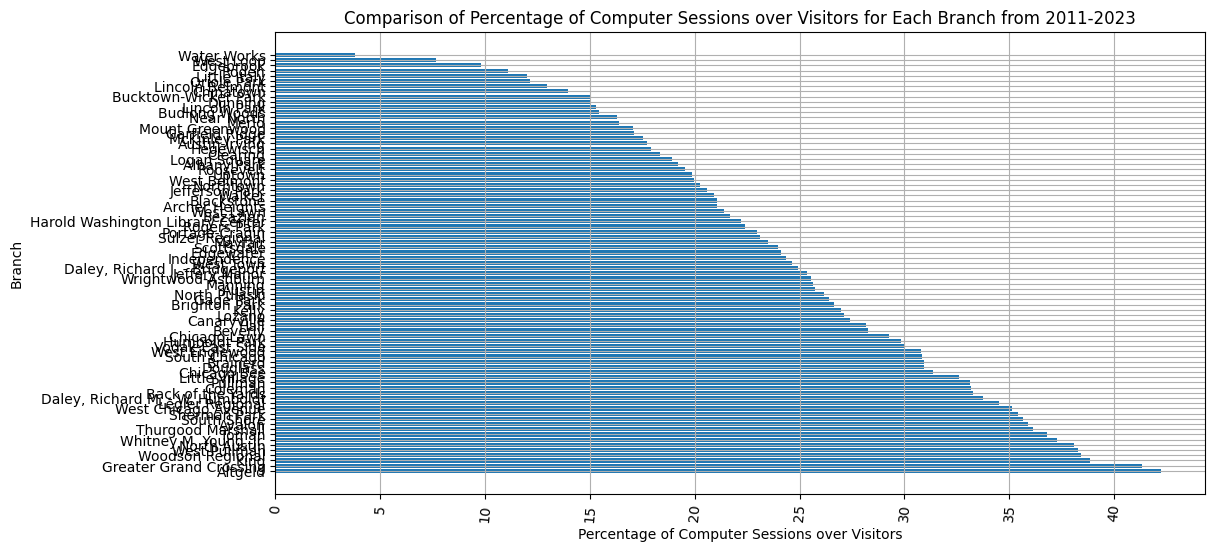

In [23]:
# Calculate the sum of Computer Sessions and sum of Visitors from all years
branch_metrics2 = branches_nonzero.groupby('BRANCH').agg({'COMPUTER_SESSIONS': 'sum', 'VISITORS': 'sum'})

# Adding a column that calculates the Computer Session Percentage (computer sessions/visitors)*100
branch_metrics2['COMPUTER_SESSION_PERCENTAGE'] = (branch_metrics2['COMPUTER_SESSIONS'] / branch_metrics2['VISITORS']) * 100

# Sort percentages of Computer Sessions from greatest to least
branch_metrics_sorted = branch_metrics2.sort_values('COMPUTER_SESSION_PERCENTAGE', ascending=False)

# Plot 
plt.figure(figsize=(12, 6))
plt.barh(branch_metrics_sorted.index, branch_metrics_sorted['COMPUTER_SESSION_PERCENTAGE'])
plt.xlabel('Percentage of Computer Sessions over Visitors')
plt.ylabel('Branch')
plt.title('Comparison of Percentage of Computer Sessions over Visitors for Each Branch from 2011-2023')
plt.xticks(rotation=85)
plt.grid(True)
plt.show()

### What I Noticed:

- In the Zero's graph, Water Works is significantly higher
- In the Nonzeros, Altgeld is the highest, but still much less than Water Works

## Adding in Computer Session Percentage Column: 

In [38]:
# New Dataframe with all branches that includes the "Computer Session Percentage" column
branches_cp = branches
branches_cp['COMPUTER_SESSION_PERCENTAGE'] = (branches['COMPUTER_SESSIONS'] / branches['VISITORS']) * 100
#branches_cp_sorted = branches_cp.sort_values('COMPUTER_SESSIONS_PERCENTAGE', ascending=False)
#branches_cp_sorted

TypeError: 'int' object is not subscriptable

TypeError: 'value' must be an instance of str or bytes, not a numpy.int64

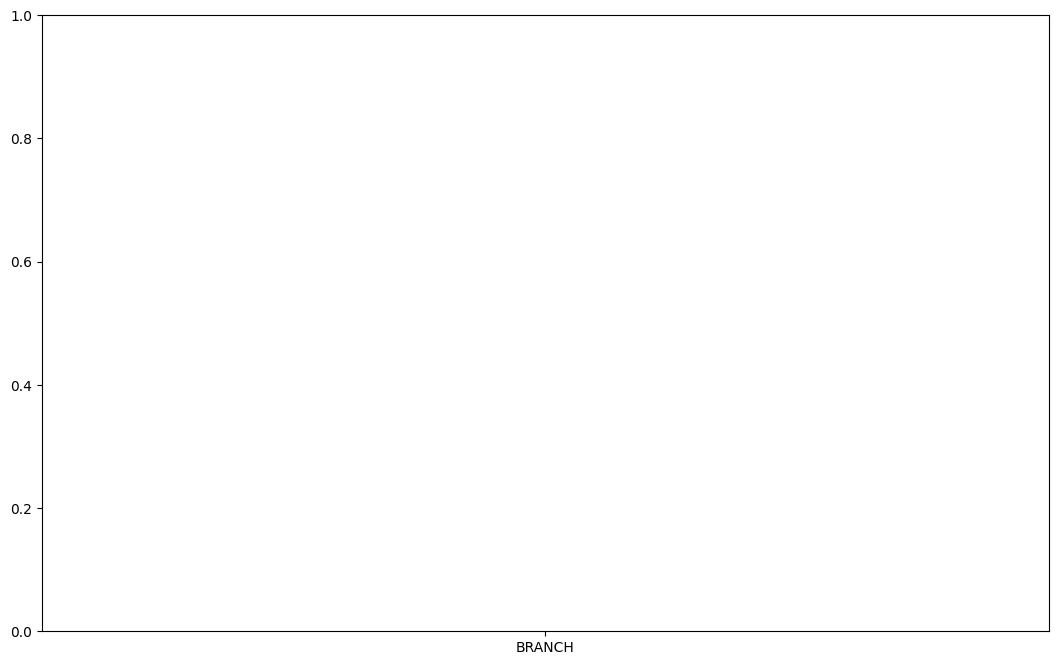

In [32]:
branches_groupby_nonzero = branches_cp.groupby(['BRANCH', 'YEAR'])['COMPUTER_SESSIONS_PERCENTAGE'].mean().unstack()
plt.figure(figsize=(13, 8))
for branch in branches_cp.index:
    plt.plot(branches_cp.columns, branches_cp.loc[branch], label=branch)
plt.xlabel('Year')
plt.ylabel('Percentage of Computer Sessions')
plt.title('Percentage of Computer Sessions over Visitors for Each Branch from 2011-2023')
#plt.legend()
plt.grid(True)
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a numpy.int64

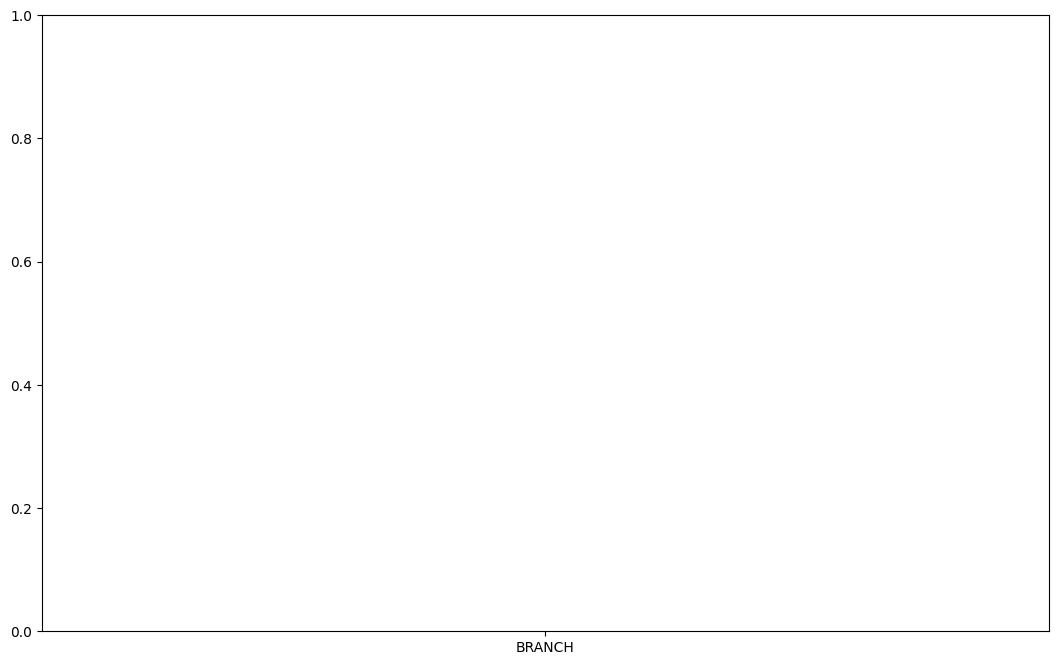

In [15]:
branches_groupby = branches_cp.groupby(['BRANCH', 'YEAR'])['COMPUTER_SESSIONS_PERCENTAGE'].mean().unstack()
plt.figure(figsize=(13, 8))
for branch in branches_cp.index:
    plt.plot(branches_cp.columns, branches_cp.loc[branch], label=branch)
plt.xlabel('Year')
plt.ylabel('Percentage of Computer Sessions')
plt.title('Percentage of Computer Sessions over Visitors for Each Branch from 2011-2023')
#plt.legend()
plt.grid(True)
plt.show()
branches_groupby

Explanation For Above Graph:
- First, I created a new DataFrame that includes an additional column for the Computer Session Percentage
- Then, it plots those percentages for all branches
- Atgeld is the orange line

In [23]:
branches['DATE'] = pd.to_datetime(branches[['YEAR', 'MONTH']].assign(DAY=1))

monthly_visitors_nonzero = branches.groupby('DATE')['VISITORS'].mean()

- playinga round with 0 vs non zeo
    **Copy Above code and compare with chart that includes 0
- look at library branches that correpond to the outlier branches with cut offs
- look behind the scenes at dataframes: select by location and look at visitors, 
- check visitors counts to see if they were low (are there zeros, infnity values, Nan)


- try plotting Altgeld month by month (over 100%)  using datetime code
- generate average for all branches , and compare that average to indivdual branches: "How to get the average within a column of a python dataframe"